In [35]:
%matplotlib inline

import setGPU
import os, h5py
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import LogNorm, Normalize
import glob
from plots import loadModel, getMetric
from scipy.stats import wasserstein_distance

from scipy.special import rel_entr

import scipy as sp

from plots import KL, jsd, wDist, kls, js

In [36]:
f = h5py.File('/mnt/ceph/users/vbarinpa/single_particle/all_noPU.h5', 'r')
#f = h5py.File('/bigdata/shared/HGCAL_data/single_particle/all_noPU.h5', 'r')
X = np.asarray(f['image'])
np.random.shuffle(X)

# Evaluation of the model per step, using the Wasserstein Distance, KL divergence, and JS divergence

In [6]:
gen_model2 = '../trial37/weights/generator_model_bs_128_lr_0.00005_latent_100_ncritic_5_clip_0.01.json'
all_g_weight = '../trial37/weights/generator_weights_step_*.h5'

g = loadModel(gen_model2)

latent_space=100
n_samples = 2000
noise = np.random.normal(0, 1, (n_samples, latent_space))

Using TensorFlow backend.


In [16]:
w_dist = wDist(all_g_weight, gen_model2)

In [20]:
kls = kl(all_g_weight, gen_model2)

/mnt/home/vbarinpa/hgcal_wgan/notebooks/plots.py:488: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(a != 0, a * np.log(a / b), 0))
/mnt/home/vbarinpa/hgcal_wgan/notebooks/plots.py:488: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(a != 0, a * np.log(a / b), 0))


In [24]:
jss = js(all_g_weight, gen_model2)

## Mean of the distance scores in {x, y, z} axes

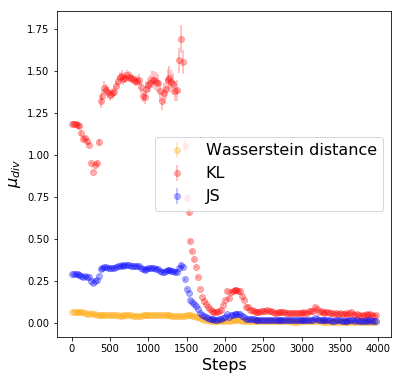

In [27]:
plt.figure(figsize=(6, 6))

plt.errorbar(w_dist[:, 0], np.mean(w_dist[:, [1, 2, 3]], axis=1), yerr=np.std(w_dist[:, [1, 2, 3]], axis=1)/np.sqrt(len(w_dist[:, 1])), color='orange', alpha = 0.3, fmt='o', label='Wasserstein distance')
plt.errorbar(kls[:, 0], np.mean(kls[:, [1, 2, 3]], axis=1), yerr=np.std(kls[:, [1, 2, 3]], axis=1)/np.sqrt(len(kls[:, 1])), color='red', alpha = 0.3, fmt='o', label='KL')
plt.errorbar(jss[:, 0], np.mean(jss[:, [1, 2, 3]], axis=1), yerr=np.std(jss[:, [1, 2, 3]], axis=1)/np.sqrt(len(jss[:, 1])), alpha = 0.3, fmt='o', color = 'blue', label='JS')

plt.xlabel("Steps", size=16)
plt.ylabel(r"$\mu_{div}$", size=16)
plt.legend(prop={'size': 16})
#plt.yscale('log')

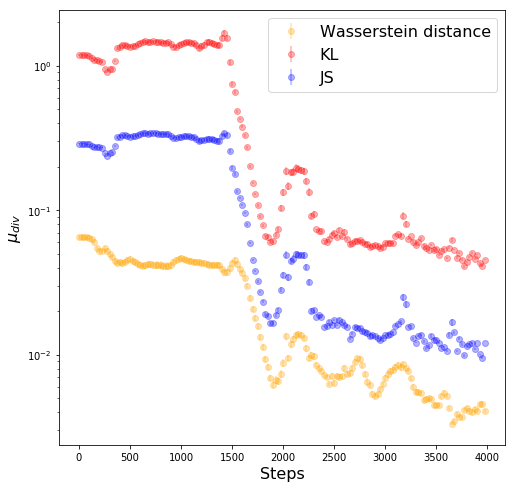

In [28]:
plt.figure(figsize=(8, 8))

plt.errorbar(w_dist[:, 0], np.mean(w_dist[:, [1, 2, 3]], axis=1), yerr=np.std(w_dist[:, [1, 2, 3]], axis=1)/np.sqrt(len(w_dist[:, 1])), color='orange', alpha = 0.3, fmt='o', label='Wasserstein distance')
plt.errorbar(kls[:, 0], np.mean(kls[:, [1, 2, 3]], axis=1), yerr=np.std(kls[:, [1, 2, 3]], axis=1)/np.sqrt(len(kls[:, 1])), color='red', alpha = 0.3, fmt='o', label='KL')
plt.errorbar(jss[:, 0], np.mean(jss[:, [1, 2, 3]], axis=1), yerr=np.std(jss[:, [1, 2, 3]], axis=1)/np.sqrt(len(jss[:, 1])), alpha = 0.3, fmt='o', color = 'blue', label='JS')

plt.xlabel("Steps", size=16)
plt.ylabel(r"$\mu_{div}$", size=16)
plt.legend(prop={'size': 16})
plt.yscale('log')

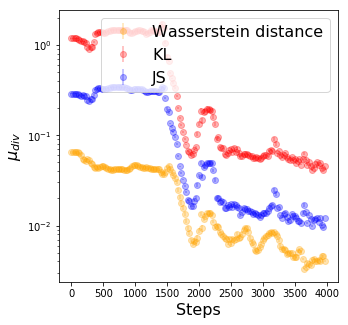

In [29]:
plt.figure(figsize=(5, 5))

plt.errorbar(w_dist[:, 0], np.mean(w_dist[:, [1, 2, 3]], axis=1), yerr=np.std(w_dist[:, [1, 2, 3]], axis=1)/np.sqrt(len(w_dist[:, 1])), color='orange', alpha = 0.3, fmt='o', label='Wasserstein distance')
plt.errorbar(kls[:, 0], np.mean(kls[:, [1, 2, 3]], axis=1), yerr=np.std(kls[:, [1, 2, 3]], axis=1)/np.sqrt(len(kls[:, 1])), color='red', alpha = 0.3, fmt='o', label='KL')
plt.errorbar(jss[:, 0], np.mean(jss[:, [1, 2, 3]], axis=1), yerr=np.std(jss[:, [1, 2, 3]], axis=1)/np.sqrt(len(jss[:, 1])), alpha = 0.3, fmt='o', color = 'blue', label='JS')

plt.xlabel("Steps", size=16)
plt.ylabel(r"$\mu_{div}$", size=16)
plt.legend(prop={'size': 16})
plt.yscale('log')

In [42]:
# plt.figure(figsize=(7, 7))

# plt.errorbar(w_dist[:, 0], np.mean(w_dist[:, [1, 2, 3]], axis=1), yerr=np.std(w_dist[:, [1, 2, 3]], axis=1)/np.sqrt(len(w_dist[:, 1])), color='orange', alpha = 0.3, fmt='o', label='Wasserstein distance')
# plt.errorbar(kls[:, 0], np.mean(kls[:, [1, 2, 3]], axis=1), yerr=np.std(kls[:, [1, 2, 3]], axis=1)/np.sqrt(len(kls[:, 1])), color='red', alpha = 0.3, fmt='o', label='KL')
# plt.errorbar(jss[:, 0], np.mean(jss[:, [1, 2, 3]], axis=1), yerr=np.std(jss[:, [1, 2, 3]], axis=1)/np.sqrt(len(jss[:, 1])), alpha = 0.3, fmt='o', color = 'blue', label='JS')

# plt.xlabel("Steps", size=16)
# plt.ylabel(r"$\mu_{div}$", size=16)
# plt.legend()
# plt.yscale('log')

# plt.ylim(0.001, 0.1)
# plt.xlim(1500, 4000)

## Distance scores per axis

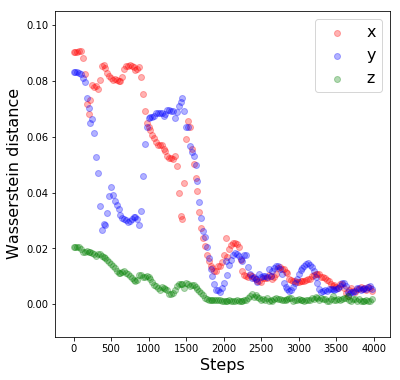

In [31]:
plt.figure(figsize=(6, 6))

plt.scatter(w_dist[:, 0], w_dist[:, 1], color='red', alpha=0.3, label='x')
plt.scatter(w_dist[:, 0], w_dist[:, 2], color='blue', alpha=0.3, label='y')
plt.scatter(w_dist[:, 0], w_dist[:, 3], color='green', alpha=0.3, label='z')

plt.xlabel("Steps", size=16)
plt.ylabel("Wasserstein distance", size=16)
plt.legend(prop={'size': 16})
#plt.yscale('log')

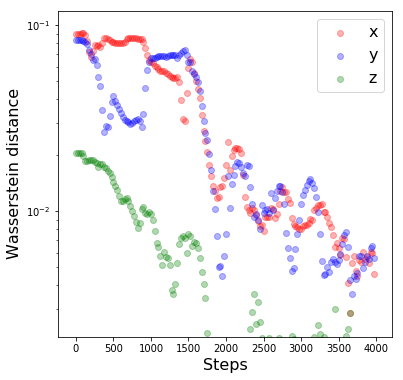

In [32]:
plt.figure(figsize=(6, 6))

plt.scatter(w_dist[:, 0], w_dist[:, 1], color='red', alpha=0.3, label='x')
plt.scatter(w_dist[:, 0], w_dist[:, 2], color='blue', alpha=0.3, label='y')
plt.scatter(w_dist[:, 0], w_dist[:, 3], color='green', alpha=0.3, label='z')

plt.xlabel("Steps", size=16)
plt.ylabel("Wasserstein distance", size=16)
plt.legend(prop={'size': 16})
plt.yscale('log')

(0.001, 0.05)

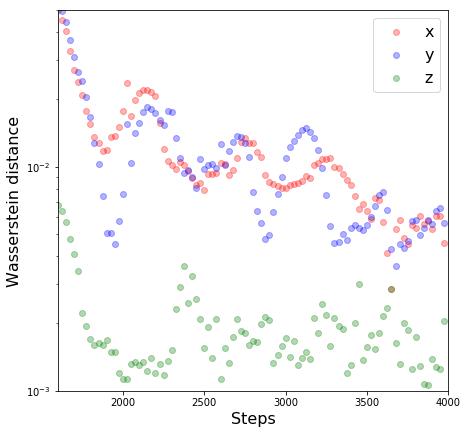

In [43]:
plt.figure(figsize=(7, 7))

plt.scatter(w_dist[:, 0], w_dist[:, 1], color='red', alpha=0.3, label='x')
plt.scatter(w_dist[:, 0], w_dist[:, 2], color='blue', alpha=0.3, label='y')
plt.scatter(w_dist[:, 0], w_dist[:, 3], color='green', alpha=0.3, label='z')

plt.xlabel("Steps", size=16)
plt.ylabel("Wasserstein distance", size=16)
plt.legend(prop={'size': 16})
plt.yscale('log')

plt.xlim(1600, 4000)
plt.ylim(0.001, 0.05)